In [1]:
import pandas as pd
import numpy as np
import json
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import requests
import re
import matplotlib.pyplot as plt

In [2]:
# Windows users
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638
[WDM] - Get LATEST driver version for 95.0.4638


[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/95.0.4638.69/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\ajgli\.wdm\drivers\chromedriver\win32\95.0.4638.69]


In [3]:
lahman_player_csv = "core\People.csv"
lahman_team_csv = "core\Teams.csv"
lahman_batting_csv = "core\Batting.csv"
lahman_appearances_csv = "core\Appearances.csv"

In [4]:
lahman_player_df = pd.read_csv(lahman_player_csv)
lahman_team_df = pd.read_csv(lahman_team_csv)
lahman_batting_df = pd.read_csv(lahman_batting_csv)
lahman_appearances_df = pd.read_csv(lahman_appearances_csv)

In [5]:
lahman_player_df['Full Name'] = lahman_player_df['nameFirst'] + " " + lahman_player_df["nameLast"]

In [6]:
mvp_url = 'https://www.baseball-reference.com/awards/mvp.shtml'
war_url = 'https://www.espn.com/mlb/war/leaders/_/type/seasonal/year/'

In [7]:
df = pd.read_html(mvp_url)

In [8]:
mvp_list = pd.DataFrame(df[0])
mvp_list

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Year                 Lg               Name   
0               2020.0                 AL         José Abreu   
1               2020.0                 NL    Freddie Freeman   
2                  NaN                NaN                NaN   
3               2019.0                 AL         Mike Trout   
4               2019.0                 NL     Cody Bellinger   
..                 ...                ...                ...   
298             1912.0                 AL       Tris Speaker   
299             1912.0                 NL        Larry Doyle   
300                NaN                NaN                NaN   
301             1911.0                 AL            Ty Cobb   
302             1911.0                 NL      Frank Schulte   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Batting Stats                      \
                    Tm                WAR            BA    OBP    SLG    HR   
0                  CHW                3.0         0.317  0.370  0.617  19.0   
1                  ATL                3.3         0.341  0.462  0.640  13.0   
2                  NaN                NaN           NaN    NaN    NaN   NaN   
3                  LAA                7.9         0.291  0.438  0.645  45.0   
4                  LAD                8.6         0.305  0.406  0.629  47.0   
..                 ...                ...           ...    ...    ...   ...   
298                BOS               10.1         0.383  0.464  0.567  10.0   
299                NYG                5.0         0.330  0.393  0.471  10.0   
300                NaN                NaN           NaN    NaN    NaN   NaN   
301                DET               10.7         0.419  0.466  0.620   8.0   
302                CHC                5.2         0.300  0.384  0.534  21.0   

                 Pitching Stats                     Unnamed: 17_level_0  
       RBI    SB              W   L  SV ERA  IP  SO              Voting  
0     60.0   0.0            NaN NaN NaN NaN NaN NaN              Voting  
1     53.0   2.0            NaN NaN NaN NaN NaN NaN              Voting  
2      NaN   NaN            NaN NaN NaN NaN NaN NaN                 NaN  
3    104.0  11.0            NaN NaN NaN NaN NaN NaN              Voting  
4    115.0  15.0            NaN NaN NaN NaN NaN NaN              Voting  
..     ...   ...            ...  ..  ..  ..  ..  ..                 ...  
298   90.0  52.0            NaN NaN NaN NaN NaN NaN              Voting  
299   91.0  36.0            NaN NaN NaN NaN NaN NaN              Voting  
300    NaN   NaN            NaN NaN NaN NaN NaN NaN                 NaN  
301  127.0  83.0            NaN NaN NaN NaN NaN NaN              Voting  
302  107.0  23.0            NaN NaN NaN NaN NaN NaN              Voting  

[303 rows x 18 columns]

In [9]:
mvp_year = np.array(mvp_list[( 'Unnamed: 0_level_0', 'Year')].values)
mvp_name = np.array(mvp_list[( 'Unnamed: 2_level_0', 'Name')].values)
mvp_team = np.array(mvp_list[( 'Unnamed: 3_level_0', 'Tm')].values)
mvp_WAR =  np.array(mvp_list[( 'Unnamed: 4_level_0', 'WAR')].values)
mvp_Pitcher =  np.array(mvp_list[( 'Pitching Stats', 'W')].values)

In [10]:
data = {'Year Won': mvp_year, 'Name': mvp_name, 'Team': mvp_team, 'MVP WAR': mvp_WAR, 'Pitcher': mvp_Pitcher}

In [11]:
mvp_df = pd.DataFrame(data)
mvp_df = mvp_df.loc[mvp_df['Pitcher'].isna() == True]
mvp_df = mvp_df[['Year Won', 'Name', 'Team', 'MVP WAR']]
mvp_df = mvp_df.dropna()
mvp_df

,Year Won,Name,Team,MVP WAR
0,2020.0,José Abreu,CHW,3.0
1,2020.0,Freddie Freeman,ATL,3.3
3,2019.0,Mike Trout,LAA,7.9
4,2019.0,Cody Bellinger,LAD,8.6
6,2018.0,Mookie Betts,BOS,10.7
...,...,...,...,...
296,1913.0,Jake Daubert,BRO,4.0
298,1912.0,Tris Speaker,BOS,10.1
299,1912.0,Larry Doyle,NYG,5.0
301,1911.0,Ty Cobb,DET,10.7


In [12]:
mvp_df.dtypes

Year Won    float64
Name         object
Team         object
MVP WAR     float64
dtype: object

In [13]:
mvp_df['Year Won'] = mvp_df['Year Won'].astype(str)
mvp_df['Year Won']= mvp_df['Year Won'].str[:4]
mvp_df['Year Won'] = mvp_df['Year Won'].astype(int)

In [14]:
next_year = []
for year in mvp_df['Year Won']:
    next_year.append(year + 1)
mvp_df['Next Year'] = next_year
mvp_df

,Year Won,Name,Team,MVP WAR,Next Year
0,2020,José Abreu,CHW,3.0,2021
1,2020,Freddie Freeman,ATL,3.3,2021
3,2019,Mike Trout,LAA,7.9,2020
4,2019,Cody Bellinger,LAD,8.6,2020
6,2018,Mookie Betts,BOS,10.7,2019
...,...,...,...,...,...
296,1913,Jake Daubert,BRO,4.0,1914
298,1912,Tris Speaker,BOS,10.1,1913
299,1912,Larry Doyle,NYG,5.0,1913
301,1911,Ty Cobb,DET,10.7,1912


In [15]:
new_df = mvp_df.loc[mvp_df['Year Won']>=2000]
new_df

,Year Won,Name,Team,MVP WAR,Next Year
0,2020,José Abreu,CHW,3.0,2021
1,2020,Freddie Freeman,ATL,3.3,2021
3,2019,Mike Trout,LAA,7.9,2020
4,2019,Cody Bellinger,LAD,8.6,2020
6,2018,Mookie Betts,BOS,10.7,2019
7,2018,Christian Yelich,MIL,7.3,2019
9,2017,Jose Altuve,HOU,7.7,2018
10,2017,Giancarlo Stanton,MIA,7.9,2018
12,2016,Mike Trout,LAA,10.5,2017
13,2016,Kris Bryant,CHC,7.3,2017


In [16]:
# next_war = []
# year_array = new_df['Year Won'].unique()
# for row in new_df.index:
#     i = 51
#     year_loop = year_array[row]
#     name = mvp_df['Name'][row]
#     year_url = f'{war_url}{year}'
#     war = ''
#     print(f'{name} {year}')
#     while i <= 201:
#     #Can be while true?
#         year_html = pd.read_html(year_url)
#         year_df = pd.DataFrame(year_html[0])
#         if year_df.loc[year_df[1] == name][2].empty and i != 151:
#             year_url = f'https://www.espn.com/mlb/war/leaders/_/year/{year}/type/seasonal/alltime/false/count/{i}'
#             i= i + 50
#             print(f'{year} {i}')
#         elif year_df.loc[year_df[1] == name][2].empty and i == 151:
#             next_war.append(war)
#             print(f'{year} {year}')
#             break
#         else:
#             war = year_df.loc[year_df[1] == name][2].values[0]
#             next_war.append(war)
#             break
    
    
    

In [17]:
# next_war = []
# current_war = []
# years = new_df['Year Won'].unique()
# for year in years:
#     next_players = new_df.loc[new_df['Next Year'] == year]['Name']
#     for player in next_players:
#         print(f'{player} {year}')
#         i = 51
#         year_url = f'{war_url}{year}'
#         war = ''
#         while i <= 201:
#         #Can be while true?
#             year_html = pd.read_html(year_url)
#             year_df = pd.DataFrame(year_html[0])
#             if year_df.loc[year_df[1] == player][2].empty and i != 151:
#                 year_url = f'https://www.espn.com/mlb/war/leaders/_/year/{year}/type/seasonal/alltime/false/count/{i}'
#                 i= i + 50
#                 print(i)
#             elif year_df.loc[year_df[1] == player][2].empty and i == 151:
#                 next_war.append(war)
#                 print(i)
#                 break
#             else:
#                 war = year_df.loc[year_df[1] == player][2].values[0]
#                 print(war)
#                 next_war.append(war)
#                 break
#     current_players = new_df.loc[new_df['Year Won'] == year]['Name']
#     for player in current_players:
#         print(f'{player} {year}')
#         i = 51
#         year_url = f'{war_url}{year}'
#         war = ''
#         while i <= 201:
#         #Can be while true?
#             year_html = pd.read_html(year_url)
#             year_df = pd.DataFrame(year_html[0])
#             if year_df.loc[year_df[1] == player][2].empty and i != 151:
#                 year_url = f'https://www.espn.com/mlb/war/leaders/_/year/{year}/type/seasonal/alltime/false/count/{i}'
#                 i= i + 50
#             elif year_df.loc[year_df[1] == player][2].empty and i == 151:
#                 current_war.append(war)
#                 break
#             else:
#                 war = year_df.loc[year_df[1] == player][2].values[0]
#                 current_war.append(war)
#                 break
    
    
    

In [18]:
next_war

NameError: name 'next_war' is not defined

In [ ]:
new_df['Next War'] = next_war
year_test = new_df['Year Won'].unique()
new_df.loc[new_df['Next Year'] == year_test[2]]

In [ ]:
#This is my testing area
# i = 51
# year = 2020
# year_url = f'{war_url}{year}'
# while i <= 201:
#     year_html = pd.read_html(year_url)
#     year_df = pd.DataFrame(year_html[0])
#     if year_df.loc[year_df[1] == 'Spencer Turnbull'][2].empty:
#         year_url = f'https://www.espn.com/mlb/war/leaders/_/year/{year}/type/seasonal/alltime/false/count/{i}'
#         i= i + 50
#         print('no')
#     else:
#         print(year_df.loc[year_df[1] == 'Spencer Turnbull'][2].values[0])
#         break   
        

In [ ]:
lahman_player_df.loc[lahman_player_df['Full Name'] == "Juan Soto"]['playerID']

In [ ]:
new_df

In [19]:
mvp_df.loc[mvp_df['Name'].str[-3:] == 'Jr.', 'Name'] = mvp_df['Name'].str[:-4]
merge_player_df = mvp_df.merge(lahman_player_df, left_on='Name', right_on='Full Name', how='left')
merge_team_df = merge_player_df.merge(lahman_batting_df, left_on=['playerID', 'Next Year'], right_on = ['playerID', 'yearID'], how='left')
merge_team_df



,Year Won,Name,Team,MVP WAR,Next Year,playerID,birthYear,birthMonth,birthDay,birthCountry,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,2020,José Abreu,CHW,3.0,2021,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,Freddie Freeman,ATL,3.3,2021,freemfr01,1989.0,9.0,12.0,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,Mike Trout,LAA,7.9,2020,troutmi01,1991.0,8.0,7.0,USA,...,46.0,1.0,1.0,35.0,56.0,4.0,3.0,0.0,4.0,1.0
3,2019,Cody Bellinger,LAD,8.6,2020,bellico01,1995.0,7.0,13.0,USA,...,30.0,6.0,1.0,30.0,42.0,2.0,0.0,0.0,0.0,4.0
4,2018,Mookie Betts,BOS,10.7,2019,bettsmo01,1992.0,10.0,7.0,USA,...,80.0,16.0,3.0,97.0,101.0,6.0,3.0,0.0,9.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1913,Jake Daubert,BRO,4.0,1914,daubeja01,1884.0,4.0,17.0,USA,...,45.0,25.0,NaN,30.0,34.0,NaN,5.0,33.0,NaN,NaN
187,1912,Tris Speaker,BOS,10.1,1913,speaktr01,1888.0,4.0,4.0,USA,...,71.0,46.0,NaN,65.0,22.0,NaN,7.0,16.0,NaN,NaN
188,1912,Larry Doyle,NYG,5.0,1913,doylela01,1886.0,7.0,31.0,USA,...,73.0,38.0,NaN,59.0,29.0,NaN,5.0,12.0,NaN,NaN
189,1911,Ty Cobb,DET,10.7,1912,cobbty01,1886.0,12.0,18.0,USA,...,83.0,61.0,NaN,43.0,NaN,NaN,5.0,8.0,NaN,NaN


In [20]:
merge_cteam_df = merge_player_df.merge(lahman_batting_df, left_on=['playerID', 'Year Won'], right_on = ['playerID', 'yearID'], how='left')
old_team = merge_cteam_df['teamID']
merge_team_df['Team'] = old_team
change_list = ["Stayed" if merge_team_df['Team'][i] == merge_team_df['teamID'][i] else "Changed" for i in merge_team_df.index]
merge_team_df['Changed Team'] = change_list
change_df = merge_team_df.loc[merge_team_df['Changed Team'] == 'Changed'][['Name', 'Year Won', 'playerID', 'Team', 'teamID', 'Changed Team', 'Full Name', 'Next Year']]
changed_df = change_df.dropna()
changed_df = changed_df.drop([31])
changed_df

,Name,Year Won,playerID,Team,teamID,Changed Team,Full Name,Next Year
7,Giancarlo Stanton,2017,stantmi03,MIA,NYA,Changed,Giancarlo Stanton,2018
34,Alex Rodriguez,2003,rodrial01,TEX,NYA,Changed,Alex Rodriguez,2004
59,Barry Bonds,1992,bondsba01,PIT,SFN,Changed,Barry Bonds,1993
183,Eddie Collins,1914,collied01,PHA,CHA,Changed,Eddie Collins,1915


In [ ]:
browser.visit('https://www.baseball-reference.com/players/a/abreujo02.shtml')

In [ ]:
# Parse the HTML
html = browser.html
html_soup = soup(html, 'html.parser')

In [ ]:
WAR_table = html_soup.find("div", {"id":"all_batting_advanced"})
for year in WAR_table.find_all('tbody'):
    row = year.find('tr', {"id": "batting_advanced.2014"})

In [ ]:
year = '2014'
year_row = year.find('tr', {"id": f'batting_advanced.{year}'})
year_row.find('td', {"data-stat":"adv_bat_wpa_bat"}).text

In [21]:
merge_team_df = merge_team_df[['Name', 'Year Won', 'MVP WAR', 'playerID', 'Team', 'teamID', 'Changed Team', 'Full Name', 'Next Year']]
merge_team_df

    

,Name,Year Won,MVP WAR,playerID,Team,teamID,Changed Team,Full Name,Next Year
0,José Abreu,2020,3.0,NaN,NaN,NaN,Changed,NaN,2021
1,Freddie Freeman,2020,3.3,freemfr01,ATL,NaN,Changed,Freddie Freeman,2021
2,Mike Trout,2019,7.9,troutmi01,LAA,LAA,Stayed,Mike Trout,2020
3,Cody Bellinger,2019,8.6,bellico01,LAN,LAN,Stayed,Cody Bellinger,2020
4,Mookie Betts,2018,10.7,bettsmo01,BOS,BOS,Stayed,Mookie Betts,2019
...,...,...,...,...,...,...,...,...,...
186,Jake Daubert,1913,4.0,daubeja01,BRO,BRO,Stayed,Jake Daubert,1914
187,Tris Speaker,1912,10.1,speaktr01,BOS,BOS,Stayed,Tris Speaker,1913
188,Larry Doyle,1912,5.0,doylela01,NY1,NY1,Stayed,Larry Doyle,1913
189,Ty Cobb,1911,10.7,cobbty01,DET,DET,Stayed,Ty Cobb,1912


In [22]:
final_df = merge_team_df.dropna()
final_df['Letter'] = final_df['playerID'].str[0]
final_df

# mvp_df.loc[mvp_df['Name'].str[-3:] == 'Jr.', 'Name']

C:\Users\ajgli\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Year Won,MVP WAR,playerID,Team,teamID,Changed Team,Full Name,Next Year,Letter
2,Mike Trout,2019,7.9,troutmi01,LAA,LAA,Stayed,Mike Trout,2020,t
3,Cody Bellinger,2019,8.6,bellico01,LAN,LAN,Stayed,Cody Bellinger,2020,b
4,Mookie Betts,2018,10.7,bettsmo01,BOS,BOS,Stayed,Mookie Betts,2019,b
5,Christian Yelich,2018,7.3,yelicch01,MIL,MIL,Stayed,Christian Yelich,2019,y
6,Jose Altuve,2017,7.7,altuvjo01,HOU,HOU,Stayed,Jose Altuve,2018,a
...,...,...,...,...,...,...,...,...,...,...
186,Jake Daubert,1913,4.0,daubeja01,BRO,BRO,Stayed,Jake Daubert,1914,d
187,Tris Speaker,1912,10.1,speaktr01,BOS,BOS,Stayed,Tris Speaker,1913,s
188,Larry Doyle,1912,5.0,doylela01,NY1,NY1,Stayed,Larry Doyle,1913,d
189,Ty Cobb,1911,10.7,cobbty01,DET,DET,Stayed,Ty Cobb,1912,c


In [23]:
war_url = 'https://www.baseball-reference.com/players/'
next_war = []
failed = []
year_array = final_df['Next Year'].unique()
year_array
for row in final_df.index:
    letter = final_df['Letter'][row]
    pid = final_df['playerID'][row]
    year = final_df['Next Year'][row]
    war_id = f'batting_value.{year}'
    try:
        browser.visit(f'{war_url}{letter}/{pid}.shtml')
        # Parse the HTML
        html = browser.html
        html_soup = soup(html, 'html.parser')
        year_row = html_soup.find('tr', {"id": war_id})
        war = year_row.find('td', {"data-stat":"WAR"}).text
        next_war.append(war)
    except:
        print(f'{pid} was not found')
        failed.append(pid)
        next_war.append('0.8')

1.8
1.6
7.3
7.0
5.1
4.4
6.9
5.7
7.2
1.5
9.6
5.1
6.4
7.5
5.3
6.9
3.8
6.6
5.9
7.5
5.6
9.7
6.8
5.5
2.9
2.9
4.5
8.5
5.7
0.6
7.6
10.6
4.9
9.2
3.6
11.7
9.2
5.2
4.8
5.7
3.9
4.8
6.6
5.7
2.7
4.1
5.6
7.2
5.3
4.9
6.4
6.2
9.9
4.1
5.0
4.6
8.0
2.5
4.1
2.2
0.9
0.8
4.9
6.1
7.2
2.9
5.8
10.0
5.6
7.3
7.1
7.4
3.3
7.7
-1.5
6.7
1.2
6.4
6.7
5.0
4.9
4.9
5.8
4.5
9.6
0.5
5.1
5.7
5.9
2.9
4.7
2.7
3.6
4.1
4.9
6.6
10.5
1.8
5.4
8.9
1.3
9.0
4.5
1.8
5.5
2.9
3.7
3.7
8.7
6.9
2.0
4.1
7.9
4.5
10.2
8.7
11.3
6.2
0.6
4.5
9.1
4.4
0.1
1.1
5.8
4.0
3.6
3.9
7.3
3.1
9.1
6.9
6.3
9.6
5.1
5.0
2.8
8.9
6.5
6.4
4.8
0.2
2.2
7.2
6.8
2.4
5.2
4.6
8.2
0.5
3.2
5.2
8.4
9.0
7.9
1.1
0.4
3.9
3.3
9.5
6.8
2.4
ofarrbo01 was not found
0.3
4.5
11.8
9.4
1.6
2.7
8.4
3.4
9.2
1.5


In [24]:
final_war = [float(item) for item in next_war]
final_df['Next WAR'] = final_war
# final_df.loc[final_df['playerID'] == 'ofarrbo01']
final_df

C:\Users\ajgli\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Year Won,MVP WAR,playerID,Team,teamID,Changed Team,Full Name,Next Year,Letter,Next WAR
2,Mike Trout,2019,7.9,troutmi01,LAA,LAA,Stayed,Mike Trout,2020,t,1.8
3,Cody Bellinger,2019,8.6,bellico01,LAN,LAN,Stayed,Cody Bellinger,2020,b,1.6
4,Mookie Betts,2018,10.7,bettsmo01,BOS,BOS,Stayed,Mookie Betts,2019,b,7.3
5,Christian Yelich,2018,7.3,yelicch01,MIL,MIL,Stayed,Christian Yelich,2019,y,7.0
6,Jose Altuve,2017,7.7,altuvjo01,HOU,HOU,Stayed,Jose Altuve,2018,a,5.1
...,...,...,...,...,...,...,...,...,...,...,...
186,Jake Daubert,1913,4.0,daubeja01,BRO,BRO,Stayed,Jake Daubert,1914,d,2.7
187,Tris Speaker,1912,10.1,speaktr01,BOS,BOS,Stayed,Tris Speaker,1913,s,8.4
188,Larry Doyle,1912,5.0,doylela01,NY1,NY1,Stayed,Larry Doyle,1913,d,3.4
189,Ty Cobb,1911,10.7,cobbty01,DET,DET,Stayed,Ty Cobb,1912,c,9.2


In [ ]:
final_df['Next WAR'].values

In [25]:
final_df['% Change'] = ((final_df['Next WAR'] - final_df['MVP WAR'])/final_df['MVP WAR']) * 100
final_df

C:\Users\ajgli\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Year Won,MVP WAR,playerID,Team,teamID,Changed Team,Full Name,Next Year,Letter,Next WAR,% Change
2,Mike Trout,2019,7.9,troutmi01,LAA,LAA,Stayed,Mike Trout,2020,t,1.8,-77.215190
3,Cody Bellinger,2019,8.6,bellico01,LAN,LAN,Stayed,Cody Bellinger,2020,b,1.6,-81.395349
4,Mookie Betts,2018,10.7,bettsmo01,BOS,BOS,Stayed,Mookie Betts,2019,b,7.3,-31.775701
5,Christian Yelich,2018,7.3,yelicch01,MIL,MIL,Stayed,Christian Yelich,2019,y,7.0,-4.109589
6,Jose Altuve,2017,7.7,altuvjo01,HOU,HOU,Stayed,Jose Altuve,2018,a,5.1,-33.766234
...,...,...,...,...,...,...,...,...,...,...,...,...
186,Jake Daubert,1913,4.0,daubeja01,BRO,BRO,Stayed,Jake Daubert,1914,d,2.7,-32.500000
187,Tris Speaker,1912,10.1,speaktr01,BOS,BOS,Stayed,Tris Speaker,1913,s,8.4,-16.831683
188,Larry Doyle,1912,5.0,doylela01,NY1,NY1,Stayed,Larry Doyle,1913,d,3.4,-32.000000
189,Ty Cobb,1911,10.7,cobbty01,DET,DET,Stayed,Ty Cobb,1912,c,9.2,-14.018692


In [ ]:
x = np.arange(len(final_df['Changed Team']))  # the label locations
width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2,final_df['MVP WAR'] , width, label='MVP')
# rects2 = ax.bar(x + width/2, final_df['Next WAR'], width, label='Next')
# ax.bar()

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()


x

[0 1]


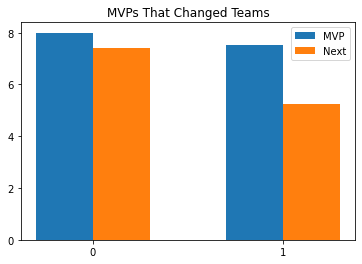

In [43]:
tdf =final_df.groupby('Changed Team')[['MVP WAR', 'Next WAR']].mean()
tdf
x = np.arange(len(final_df['Changed Team'].unique()))
y_label = np.arange(0, 10, 2)
width = .3
print(x)
fig, ax = plt.subplots()

bar1 = ax.bar(x - width/2, tdf['MVP WAR'], width, label = 'MVP')
bar2 = ax.bar(x + width/2, tdf['Next WAR'], width, label = 'Next')

ax.set_xticks(x)
ax.legend()
ax.set_title("MVPs That Changed Teams")

ax.set_yticks(y_label)

plt.show()




In [27]:
change_df = final_df.loc[merge_team_df['Changed Team'] == 'Changed'][['Name', 'Year Won', 'playerID', 'Team', 'teamID', 'Changed Team', 'Full Name', 'Next Year', 'MVP WAR', 'Next WAR', '% Change']]
changed_df = change_df.dropna()
changed_df = changed_df.drop([31])
changed_df

,Name,Year Won,playerID,Team,teamID,Changed Team,Full Name,Next Year,MVP WAR,Next WAR,% Change
7,Giancarlo Stanton,2017,stantmi03,MIA,NYA,Changed,Giancarlo Stanton,2018,7.9,4.4,-44.303797
34,Alex Rodriguez,2003,rodrial01,TEX,NYA,Changed,Alex Rodriguez,2004,8.4,7.6,-9.523810
59,Barry Bonds,1992,bondsba01,PIT,SFN,Changed,Barry Bonds,1993,9.0,9.9,10.000000
183,Eddie Collins,1914,collied01,PHA,CHA,Changed,Eddie Collins,1915,9.1,9.4,3.296703


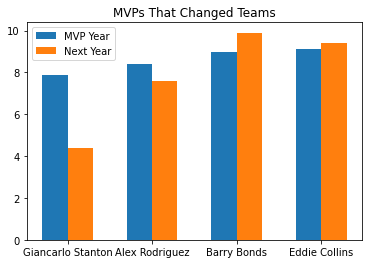

In [28]:
graph_change = changed_df.groupby('Name')[['MVP WAR', 'Next WAR']].mean()

indx = np.arange(len(changed_df['Name']))
indx

war_label = np.arange(0, 12, 2)
bar_width = .30

fig, ax = plt.subplots()
barMVP = ax.bar(indx - bar_width/2, changed_df['MVP WAR'], bar_width, label ='MVP Year')
barNext = ax.bar(indx + bar_width/2, changed_df['Next WAR'], bar_width, label ='Next Year')

ax.legend()

ax.set_xticks(indx)
ax.set_xticklabels(changed_df['Name'])
ax.set_title("MVPs That Changed Teams")

ax.set_yticks(war_label)

plt.show()

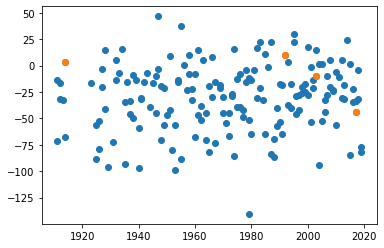

In [29]:
plt.scatter(final_df['Year Won'], final_df['% Change'])
plt.scatter(changed_df['Year Won'], changed_df['% Change'])

(array([1., 0., 0., 0., 0., 0., 1., 0., 1., 1.]),
 array([-44.30379747, -38.87341772, -33.44303797, -28.01265823,
        -22.58227848, -17.15189873, -11.72151899,  -6.29113924,
         -0.86075949,   4.56962025,  10.        ]),
 <BarContainer object of 10 artists>)

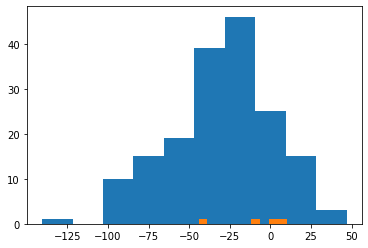

In [30]:
plt.hist(final_df['% Change'])
plt.hist(changed_df['% Change'])

In [38]:
final_df.loc[final_df['% Change'] >= 0]

,Name,Year Won,MVP WAR,playerID,Team,teamID,Changed Team,Full Name,Next Year,Letter,Next WAR,% Change
10,Josh Donaldson,2015,7.1,donaljo02,TOR,TOR,Stayed,Josh Donaldson,2016,d,7.2,1.408451
12,Mike Trout,2014,7.7,troutmi01,LAA,LAA,Stayed,Mike Trout,2015,t,9.6,24.675325
15,Miguel Cabrera,2012,7.1,cabremi01,DET,DET,Stayed,Miguel Cabrera,2013,c,7.5,5.633803
24,Albert Pujols,2008,9.2,pujolal01,SLN,SLN,Stayed,Albert Pujols,2009,p,9.7,5.434783
30,Albert Pujols,2005,8.4,pujolal01,SLN,SLN,Stayed,Albert Pujols,2006,p,8.5,1.190476
31,Vladimir Guerrero,2004,5.6,guerrvl01,ANA,LAA,Changed,Vladimir Guerrero,2005,g,5.7,1.785714
35,Barry Bonds,2003,9.2,bondsba01,SFN,SFN,Stayed,Barry Bonds,2004,b,10.6,15.217391
40,Jason Giambi,2000,7.8,giambja01,OAK,OAK,Stayed,Jason Giambi,2001,g,9.2,17.948718
51,Mo Vaughn,1995,4.3,vaughmo01,BOS,BOS,Stayed,Mo Vaughn,1996,v,5.6,30.232558
52,Barry Larkin,1995,5.9,larkiba01,CIN,CIN,Stayed,Barry Larkin,1996,l,7.2,22.033898


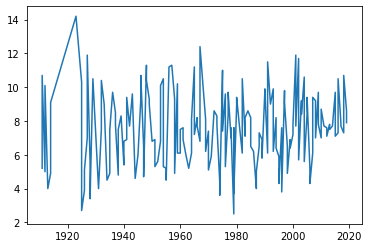

In [39]:
plt.plot(final_df['Year Won'], final_df['MVP WAR'])

In [41]:
final_df.sort_values('MVP WAR', ascending = False)

,Name,Year Won,MVP WAR,playerID,Team,teamID,Changed Team,Full Name,Next Year,Letter,Next WAR,% Change
181,Babe Ruth,1923,14.2,ruthba01,NYA,NYA,Stayed,Babe Ruth,1924,r,11.8,-16.901408
110,Carl Yastrzemski,1967,12.4,yastrca01,BOS,BOS,Stayed,Carl Yastrzemski,1968,y,10.5,-15.322581
39,Barry Bonds,2001,11.9,bondsba01,SFN,SFN,Stayed,Barry Bonds,2002,b,11.7,-1.680672
174,Lou Gehrig,1927,11.9,gehrilo01,NYA,NYA,Stayed,Lou Gehrig,1928,g,9.5,-20.168067
37,Barry Bonds,2002,11.7,bondsba01,SFN,SFN,Stayed,Barry Bonds,2003,b,9.2,-21.367521
...,...,...,...,...,...,...,...,...,...,...,...,...
84,Don Baylor,1979,3.7,baylodo01,CAL,CAL,Stayed,Don Baylor,1980,b,-1.5,-140.540541
97,Jeff Burroughs,1974,3.6,burroje01,TEX,TEX,Stayed,Jeff Burroughs,1975,b,0.5,-86.111111
172,Mickey Cochrane,1928,3.4,cochrmi01,PHA,PHA,Stayed,Mickey Cochrane,1929,c,3.9,14.705882
179,Roger Peckinpaugh,1925,2.7,peckiro01,WS1,WS1,Stayed,Roger Peckinpaugh,1926,p,0.3,-88.888889
